In [17]:
import circle
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
from scipy import stats, signal, ndimage, optimize, interpolate, optimize
import matplotlib
from tqdm import tqdm
import pandas as pd
from pylab import mpl

In [18]:
path=r"F:\文件数据\2023_11_04_YNB\06_35000x_alpha0p42\scan_x128_y128.raw"
# Read data
data = circle.readData(path)
imgh, imgw, pxh, pxw = data.shape

In [19]:
# Select one of the diffraction disks
# Process the data array by replacing NaN values with 0, shifting the data values to non-negative,and adding a small positive offset.
data_one_pat = circle.handData(data[1][1])


# Normalize the data array and convert it to a grayscale pixel value range
show_one_pat = (((data_one_pat - data_one_pat.min()) / (data_one_pat.max() - data_one_pat.min())) * 255).astype(np.uint8)

x= 61.51282051282051 y= 55.56895356895357


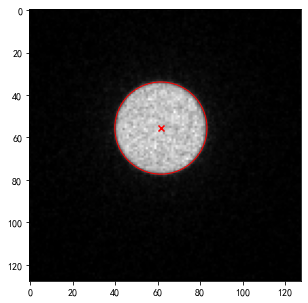

In [20]:
# Call the centroid method to calculate

#     Parameters
#     ----------
#     data (np.ndarray): Input data array, expected to be a 2D NumPy array.  
#     flag (bool, optional): If True, apply filtering to the data before calculating the centroid. Defaults to False. 

#x, y = circle.calculate_centroid(show_one_pat)# After preprocessing
x, y = circle.calculate_centroid(show_one_pat,flag=True)#preprocessing
print('x=', x, 'y=', y)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(show_one_pat, cmap='gray')
r=21.7 # radius
c = plt.Circle((x, y),r, color='red', linewidth=1, fill=False)
plt.scatter([x], [y], color='red', marker='x', label='True Center')
ax.add_patch(c)
plt.show()

ref_x= 62.82871096479253 ref_y= 53.95135891002734 ref_r= 21.683431428778015
x= 61.72965238956776 y= 55.79109139809105


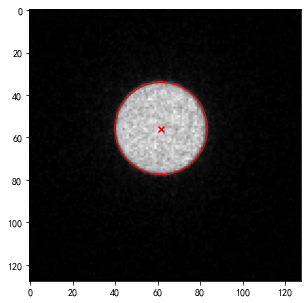

In [21]:
# Call the Cross-correlation to calculate

# Calculate the reference pattern
ref = np.nansum(data, axis=(0, 1)) / (imgh * imgw)
ref = (((ref - ref.min()) / (ref.max() - ref.min())) * 255).astype(np.uint8)  # Normalize and convert to uint8
binary = circle.filtering(ref)
ref_y, ref_x, ref_r = circle.find_circle_in_image(binary)  # Fit a circle to the reference pattern
print('ref_x=', ref_x, 'ref_y=', ref_y, 'ref_r=', ref_r)

# Define the radius for the ring kernel
radius = int(ref_r) + 1

# Generate a ring-shaped kernel
kernel = circle.generate_ring_kernel(radius, ring_size=1)

# Calculate the cross-correlation coordinates

#     Parameters
#     ----------
#     data1 : 2D array of int or float
#         The first 2D array.
#     data2 : 2D array of int or float
#         The second 2D array.
#     step : int, optional
#         The degree of the polynomial used for fitting. Default is 5.
#     flag : bool, optional
#         Flag indicating whether to perform filtering. Default is False.

x, y = circle.getCorre(show_one_pat, kernel,step=7) 
#x, y = circle.getCorre(show_one_pat, kernel)
print('x=', x, 'y=', y)

# Plot the result
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(show_one_pat, cmap='gray')
r = 21.7  # Radius
c = plt.Circle((x, y), r, color='red', linewidth=1, fill=False)  # Draw a circle representing the detected center
plt.scatter([x], [y], color='red', marker='x', label='True Center')  # Plot the true center
ax.add_patch(c)
plt.show()

x= 61.4728476821192 y= 55.46225165562914 r= 21.461912384938476


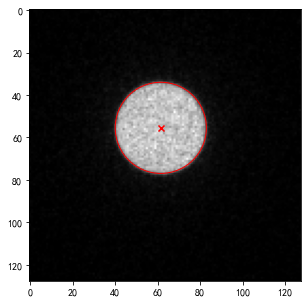

In [22]:
# Call the Hough circle to calculate

# Parameters
#     ----------
#     data : ndarray
#         The input image data on which circle detection is to be performed.
#     radius : float, optional
#         The radius of the circle. If not provided, it will be estimated.
#     flag : bool, optional
#         A flag indicating whether to apply an additional filtering step to the input data. Defaults to False.
#     theta_step : float, optional
#         The step size used to generate the sine and cosine lookup tables in the Hough Circle Transform.
#         Smaller values result in more precise but slower computations. Defaults to 0.01.
#     threshold_factor : float, optional
#         A factor that multiplies the maximum gradient magnitude to set the threshold for circle detection.
#         Adjusting this value can affect the sensitivity of circle detection. Defaults to 0.15.


x, y, r= circle.hough_circle_transform(show_one_pat,flag=True,theta_step=0.01, threshold_factor=0.15)
#x, y, r = circle.hough_circle_transform(show_one_pat)
print('x=', x, 'y=', y, 'r=', r)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(show_one_pat, cmap='gray')
#r=21.4 # radius
c = plt.Circle((x, y),r, color='red', linewidth=1, fill=False)
plt.scatter([x], [y], color='red', marker='x', label='True Center')
ax.add_patch(c)
plt.show()

x= 61.355770087305146 y= 55.42185905945067 r= 21.44067544017914


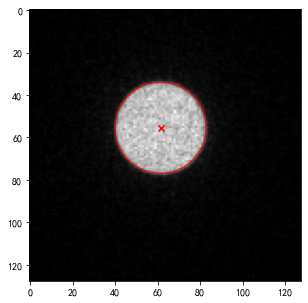

In [23]:
# Call the Radial gradient to calculate

#     Parameters
#     ----------
#     data: The input image data, expected to be a 2D array (e.g., grayscale image).  
#     flag (bool, optional): If True, forces the image to be filtered before further processing. Defaults to False.  
#     blobs (list of tuples, optional): Initial blob center coordinates (x, y). If None, it will be automatically detected.  blobs=[[66,55]]
#     radius (float, optional): Initial radius estimate. If None, it will be estimated based on blob detection.  
#     num_rings (int, optional): Number of rings used for radial gradient analysis. Higher values provide finer gradient analysis.  
#     ring_range (int, optional): Range of pixels to sample around each ring for gradient calculation. Larger values may increase noise sensitivity.  
#     num_points (int, optional): Number of points sampled per ring for gradient analysis. More points improve accuracy but increase computation.  
#     threshold (float, optional): Threshold for detecting local maxima in the radial gradient. Higher values make detection stricter.


x, y, r =circle.Jxtd(show_one_pat,flag=True,num_rings=60, ring_range=2, num_points=80, threshold=2)
#x, y, r = circle.Jxtd(show_one_pat)
# One more parameter step size, the default is 0.1, you can choose a lower step size such as 0.0001
#x_, y_, r = circle.Jxtd1(data_one_pat,flag=True,num_rings=100,ring_range=1, num_points=200, threshold=2，step=0.1)
print('x=', x, 'y=', y, 'r=', r)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(show_one_pat, cmap='gray')
#r=21.4 # radius
c = plt.Circle((x, y),r, color='red', linewidth=1, fill=False)
plt.scatter([x], [y], color='red', marker='x', label='True Center')
ax.add_patch(c)
plt.show()

x= 61.549100742667164 y= 55.58396026128934 r= 21.421235976828385


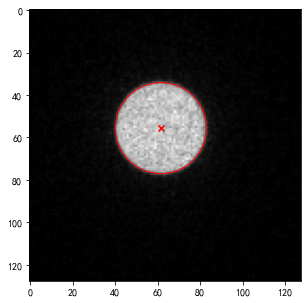

In [24]:
# Call the edge detection method to calculate

#     Parameters
#     ----------
#     data (np.ndarray): Input data array, expected to be a 2D NumPy array.  
#     flag (bool, optional): If True, apply filtering to the data before calculating the centroid. Defaults to False. 

x, y, r= circle.edge_detection_fitting_circles(show_one_pat)
print('x=', x, 'y=', y, 'r=', r)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(show_one_pat, cmap='gray')
c = plt.Circle((x, y),r, color='red', linewidth=1, fill=False)
plt.scatter([x], [y], color='red', marker='x', label='True Center')
ax.add_patch(c)
plt.show()

In [25]:
data = circle.readData(path)
imgh, imgw, pxh, pxw = data.shape
x = []
y = []
a = 0
b = imgh
c = 0
d = imgw

name = ["Centroid", "Cross-correlation", "Hough circle", "Radial gradient","edge detection"]
method = name[0]  # Choose the method for centroid calculation

# Loop through each pixel in the image
for i in tqdm(range(c, d, 1)):
    for j in range(a, b, 1):
        data_one_pat = data[i][j]
        #data_one_pat = circle.handData(data_one_pat)
        
        # Normalize and convert data_one_pat to show_one_pat for visualization
        show_one_pat = (((data_one_pat - data_one_pat.min()) / (data_one_pat.max() - data_one_pat.min())) * 255).astype(np.uint8)

        # Calculate centroid coordinates based on the selected method
        if method == "Centroid":
            x_, y_ = circle.calculate_centroid(show_one_pat)
        elif method == "Cross-correlation":
            x_, y_ = circle.getCorre(show_one_pat, kernel)
        elif method == "Hough circle":
            x_, y_, r = circle.hough_circle_transform(show_one_pat)
        elif method == "Radial gradient":
            x_, y_, r = circle.Jxtd(show_one_pat)
        elif method == "Edge detection":
            x_, y_, r = circle.Jxtd(show_one_pat)
        

        # Handle cases where the centroid coordinates are out of range or None
        if x_ < 0 or x_ >= pxh:
            x.append(0)
            y.append(0)
        elif x_ is None:
            x.append(0)
            y.append(0)
        else:
            x.append(x_)
            y.append(y_)


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:03<00:00, 39.88it/s]


In [26]:
# data storage
file_name = r'F:\数据\质心.csv'
data = pd.DataFrame({'x': x, 'y': y})
data.to_csv(file_name, index=False) #save data
x,y = circle.readCsv(file_name)  # Data reading

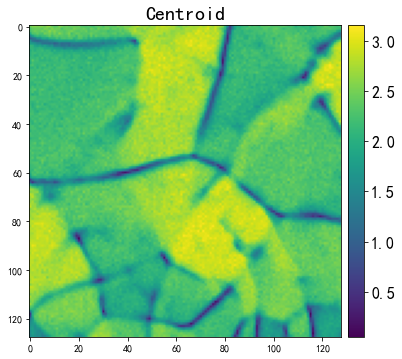

In [27]:
i=int(np.sqrt(len(x)))
x=np.array(x)
y=np.array(y)

# Matrix changes to obtain the same direction as the tif image in the collection data folder
x=circle.zy_zh(x.reshape(i,i)).reshape(-1)
y=circle.zy_zh(y.reshape(i,i)).reshape(-1)

# Smoothing filter
#x,y=circle.remove_low_frequency_noise(x, y)

# Preprocesses x and y arrays by handling missing values, subtracting mean, and computing Z values.
z, x, y = circle.handle_X_Y(x, y)

Z = np.hypot(x, y)

# Create a graphics window
fig, ax = plt.subplots( figsize=(6, 6))
im = ax.imshow(Z.reshape(i, i), cmap='viridis')
circle.add_colorbar(im,a=16)

# Modify the title and x, y axis font and size
plt.title(method, fontsize=20, fontweight='bold')
#circle.plot()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


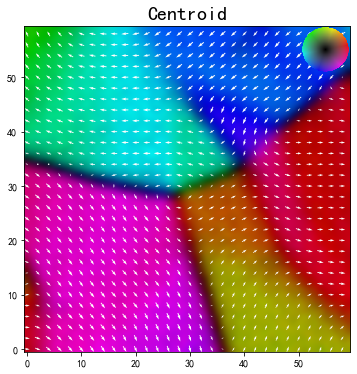

In [28]:
a = 25
b = 85
c = 40
d = 100
scan_rotation = 0.23142782688704822  # Rotation angle obtained from the <scan_rotation></scan_rotation> tags in the XML file of the dataset

angles = -30  # Need to adjust accordingly

# Crop the data to the specified region
x, y = circle.cut_data(x, y, a, b, c, d)

# Set Chinese font for display
mpl.rcParams["font.sans-serif"] = ["SimHei"]

# Create subplots for plotting
fig, axs = plt.subplots(figsize=(6, 6))

# Draw the colored detail image
image = circle.drawing(axs, x, y, scan_rotation, angles=angles, step=2)
axs.set_title(method, fontsize=20, fontweight='bold')
axs.axis('square')

# Plot the data
#circle.plot()
plt.show()